In [116]:
  
import csv
import random

# load irist dataset and randomly split it into test set and training set

def loadDataset(train, split, trainingSet=[] , testSet=[]):
	 with open(train, 'rt') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])


#############################
# SIMILARITY CHECK FUNCTION #
#############################

# euclidean distance calcualtion

import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)



############################################################
# NEIGHBOURS - selecting subset with the smallest distance #
############################################################

import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors



######################
# PREDICTED RESPONSE #
######################

import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]



######################
# MEASURING ACCURACY #
######################

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]: 
			correct = correct + 1
			
	return (correct/float(len(testSet))*100) 


In [72]:
# prepare data
trainingSet=[]
testSet=[]
split = 0.67
loadDataset('iris.data', split, trainingSet, testSet)
print ('Train set: ' + repr(len(trainingSet)))
print ('Test set: ' + repr(len(testSet)))
# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 109
Test set: 41
Accuracy: 95.1219512195122%


In [73]:
trainingSet,testSet

([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
  [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
  [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
  [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
  [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
  [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
  [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
  [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
  [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
  [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
  [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
  [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
  [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
  [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
  [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
  [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
  [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
  [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'],
  [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'],
  [4.8, 3.1, 1.6, 0.2, 'Iris-setosa'],
  [5.4, 3.4, 1.5, 0.4, 'Iris-setosa'],
  [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
  [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'],
  [5.0, 3.2, 1.2, 0.2, 'Iris-setosa'],
  [5.5, 3.5, 1.3, 0.2, 'Iris-setosa'],
  [4.4, 3.0, 1.3, 0.2, 'I

In [74]:
# prepare data
trainingSet=[]
testSet=[]
split = 0.67
loadDataset('iris.data', split, trainingSet, testSet)
print ('Train set: ' + repr(len(trainingSet)))
print ('Test set: ' + repr(len(testSet)))
# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 109
Test set: 41
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor

In [75]:
import pandas as pd
titan=pd.read_csv('train.csv')
titantest=pd.read_csv('test.csv')

In [76]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
titantest


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [78]:
titan.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [79]:
titan.Embarked.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [80]:
titan.Embarked.isnull().sum()

2

In [81]:
titan.Embarked.fillna("S") 

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [82]:
titan.Embarked=   titan.Embarked.map( {'S': 0, 'C': 1,'Q': 2})

In [83]:
titan.Embarked.isnull().sum()

2

In [84]:
titan.Embarked

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

In [85]:
titan.Sex =   titan.Sex.map( {'male': 1, 'female': 0})

In [102]:
import numpy as np

In [110]:
titan_new = titan[['Sex','Age','Embarked','Survived']].dropna()
x = []
for i in titan_new.values:
    x.append(list(i))
    
X = np.array(x)[:int(.8*len(x))]
Y = np.array(x)[int(.8*len(x)):]

In [122]:
k_acc = []
for k in range(100):
    predictions=[]
    for x in range(len(Y)):
        neighbors = getNeighbors(X, Y[x], k+1)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(Y[x][-1]))
    accuracy = getAccuracy(Y, predictions)
    k_acc.append(accuracy)
    print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 65.03496503496503%
Accuracy: 65.03496503496503%
Accuracy: 76.92307692307693%
Accuracy: 72.72727272727273%
Accuracy: 77.62237762237763%
Accuracy: 77.62237762237763%
Accuracy: 80.41958041958041%
Accuracy: 77.62237762237763%
Accuracy: 76.22377622377621%
Accuracy: 74.82517482517483%
Accuracy: 74.82517482517483%
Accuracy: 75.52447552447552%
Accuracy: 74.12587412587412%
Accuracy: 75.52447552447552%
Accuracy: 74.82517482517483%
Accuracy: 75.52447552447552%
Accuracy: 74.12587412587412%
Accuracy: 74.82517482517483%
Accuracy: 74.82517482517483%
Accuracy: 72.72727272727273%
Accuracy: 72.72727272727273%
Accuracy: 73.42657342657343%
Accuracy: 71.32867132867133%
Accuracy: 72.02797202797203%
Accuracy: 68.53146853146853%
Accuracy: 68.53146853146853%
Accuracy: 68.53146853146853%
Accuracy: 67.83216783216784%
Accuracy: 65.73426573426573%
Accuracy: 66.43356643356644%
Accuracy: 67.13286713286713%
Accuracy: 64.33566433566433%
Accuracy: 63.63636363636363%
Accuracy: 63.63636363636363%
Accuracy: 65.0

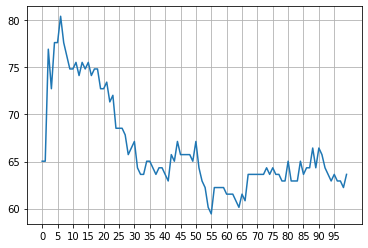

In [144]:
import matplotlib.pyplot as plt
plt.plot(k_acc)
plt.grid()
plt.xticks([i for i in range(0,len(k_acc),5)])
plt.show()


1.0

In [114]:
X

array([[ 1., 22.,  0.,  0.],
       [ 0., 38.,  1.,  1.],
       [ 0., 26.,  0.,  1.],
       ...,
       [ 1., 52.,  0.,  0.],
       [ 1., 19.,  0.,  0.],
       [ 0., 38.,  1.,  1.]])